In [28]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [29]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [30]:
# stop fuzzy charts
%config InlineBackend.figure_format = "retina"

In [31]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'

Data for this projet was sourced from CSO: https://www.cso.ie/en/statistics/

- The fertiziler data was collected https://data.cso.ie/table/AJM05 ranging from Jan 1980 - Feb 2022
- Milk data was sourced from ...

In [32]:
#datasets
df_fertilizer = pd.read_csv("../data/fertiliser_price.csv")   #fertilizer
df_milk = pd.read_csv("../data/milk_price.csv")               #milk

In [57]:
# check the data
df_fertilizer['Type of Fertiliser'].unique()

array(['Calcium Ammonium Nitrate (27.5% N)', 'Urea (46% N)',
       'Granular Superphosphate (16% P)', 'Muriate of Potash (50% K)',
       'Compound 0-10-20', 'Compound 0-7-30', 'Compound 7-6-17',
       'Compound 10-10-20', 'Compound 14-7-14', 'Compound 18-6-12',
       'Compound 24-2.5-10', 'Compound 27-2.5-5',
       'Sulphate of Potash (42% K)', 'Compound 8-5-18',
       'Compound 20-4-10', 'Sulphate of Ammonia (21%)',
       'Ammonium Sulphate Nitrate (26%)', 'Compound 10-5-25',
       'Compound 13-6-20', 'Compound 15-3-20', 'Compound 24-2.2-10',
       'Compound 24-2.2-4.5', 'Compound 19-0-15', 'Compound 25-4-0'],
      dtype=object)

In [34]:
#removing the M and replacing with the -
df_fertilizer['Month'] = df_fertilizer['Month'].str.replace("M", "-")

In [35]:
# date format
df_fertilizer['Month'] = pd.to_datetime(df_fertilizer['Month'], format='%Y-%m')

In [36]:
df_fertilizer['month_year'] = pd.to_datetime(df_fertilizer['Month']).dt.to_period('M')
df_fertilizer['month'] = pd.DatetimeIndex(df_fertilizer['Month']).month
df_fertilizer['year'] = pd.DatetimeIndex(df_fertilizer['Month']).year

In [37]:
# check the dtypes
df_fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12144 entries, 0 to 12143
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Statistic           12144 non-null  object        
 1   Month               12144 non-null  datetime64[ns]
 2   Type of Fertiliser  12144 non-null  object        
 3   UNIT                12144 non-null  object        
 4   VALUE               6979 non-null   object        
 5   month_year          12144 non-null  period[M]     
 6   month               12144 non-null  int64         
 7   year                12144 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4), period[M](1)
memory usage: 759.1+ KB


There is missing data on the VALUE column

One of the values was showing '.' instead of a number and it was making it diffcult to convert into a numeric value going to change it to NA for now

In [38]:
df_fertilizer.VALUE = df_fertilizer.VALUE.replace('.', pd.NA)

In [39]:
df_fertilizer.VALUE == "."

0        False
1        False
2        False
3        False
4        False
         ...  
12139    False
12140    False
12141    False
12142    False
12143    False
Name: VALUE, Length: 12144, dtype: bool

In [40]:
# convert to a numeric value
df_fertilizer['VALUE'] = pd.to_numeric(df_fertilizer['VALUE'])

In [41]:
#filtering 
df_com15 = df_fertilizer[df_fertilizer['Type of Fertiliser']=='Compound 15-3-20']
df_com15

,Statistic,Month,Type of Fertiliser,UNIT,VALUE,month_year,month,year
19,Fertiliser Price,1980-01-01,Compound 15-3-20,Euro per Tonne,NaN,1980-01,1,1980
43,Fertiliser Price,1980-02-01,Compound 15-3-20,Euro per Tonne,NaN,1980-02,2,1980
67,Fertiliser Price,1980-03-01,Compound 15-3-20,Euro per Tonne,NaN,1980-03,3,1980
91,Fertiliser Price,1980-04-01,Compound 15-3-20,Euro per Tonne,NaN,1980-04,4,1980
115,Fertiliser Price,1980-05-01,Compound 15-3-20,Euro per Tonne,NaN,1980-05,5,1980
...,...,...,...,...,...,...,...,...
12043,Fertiliser Price,2021-10-01,Compound 15-3-20,Euro per Tonne,NaN,2021-10,10,2021
12067,Fertiliser Price,2021-11-01,Compound 15-3-20,Euro per Tonne,NaN,2021-11,11,2021
12091,Fertiliser Price,2021-12-01,Compound 15-3-20,Euro per Tonne,NaN,2021-12,12,2021
12115,Fertiliser Price,2022-01-01,Compound 15-3-20,Euro per Tonne,764.0,2022-01,1,2022


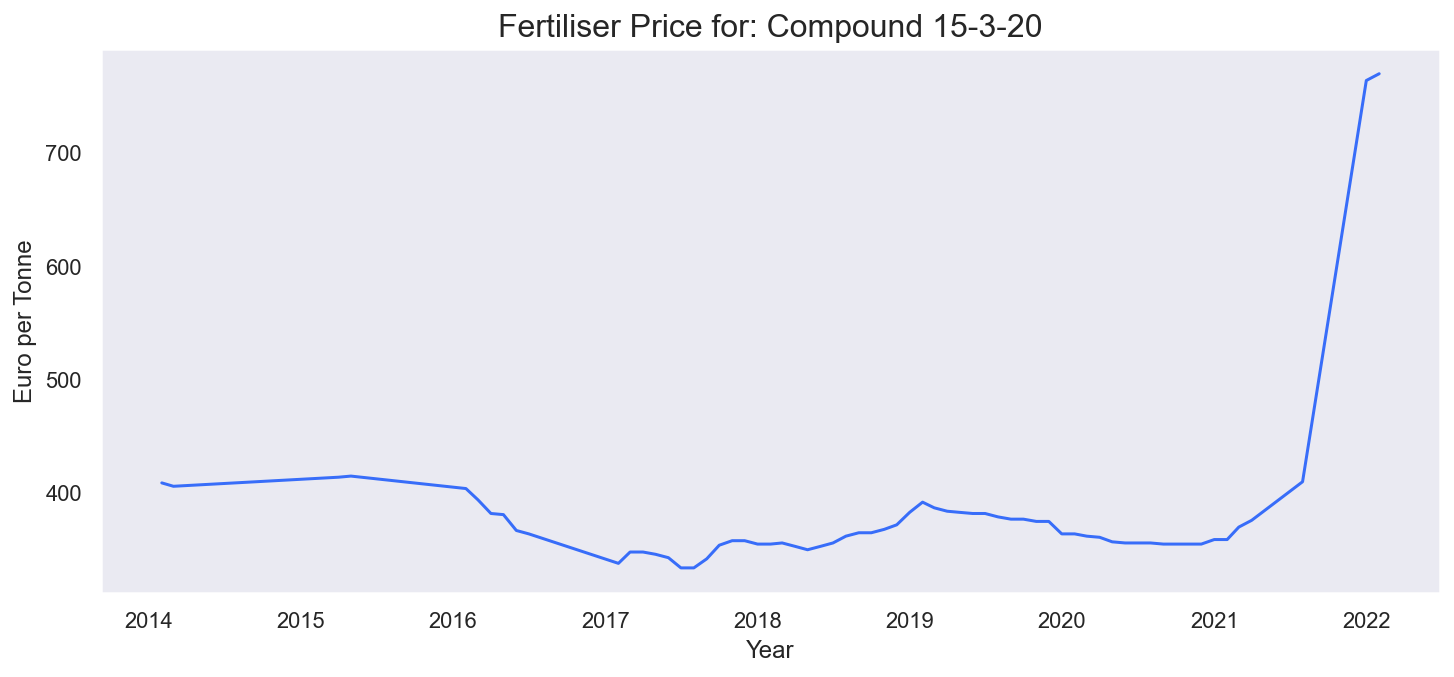

In [54]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(12, 5));  

# remove the grid on the chart
sns.set_style( {'axes.grid' : False})


# plotting month and IN, groupby if it is a bankholiday
sns.lineplot(data = df_com15, x="Month", y="VALUE");


#plt.suptitle("Fertiliser Price for: Compound 15-3-20"); 
plt.title("Fertiliser Price for: Compound 15-3-20", fontsize = 16);

plt.ylabel('Euro per Tonne');
plt.xlabel('Year');

plt.show();

In [58]:
#filtering 
df_com18612 = df_fertilizer[df_fertilizer['Type of Fertiliser']=='Compound 18-6-12']
df_com18612

,Statistic,Month,Type of Fertiliser,UNIT,VALUE,month_year,month,year
9,Fertiliser Price,1980-01-01,Compound 18-6-12,Euro per Tonne,157.0,1980-01,1,1980
33,Fertiliser Price,1980-02-01,Compound 18-6-12,Euro per Tonne,159.0,1980-02,2,1980
57,Fertiliser Price,1980-03-01,Compound 18-6-12,Euro per Tonne,161.0,1980-03,3,1980
81,Fertiliser Price,1980-04-01,Compound 18-6-12,Euro per Tonne,163.0,1980-04,4,1980
105,Fertiliser Price,1980-05-01,Compound 18-6-12,Euro per Tonne,164.0,1980-05,5,1980
...,...,...,...,...,...,...,...,...
12033,Fertiliser Price,2021-10-01,Compound 18-6-12,Euro per Tonne,499.0,2021-10,10,2021
12057,Fertiliser Price,2021-11-01,Compound 18-6-12,Euro per Tonne,505.0,2021-11,11,2021
12081,Fertiliser Price,2021-12-01,Compound 18-6-12,Euro per Tonne,593.0,2021-12,12,2021
12105,Fertiliser Price,2022-01-01,Compound 18-6-12,Euro per Tonne,707.0,2022-01,1,2022


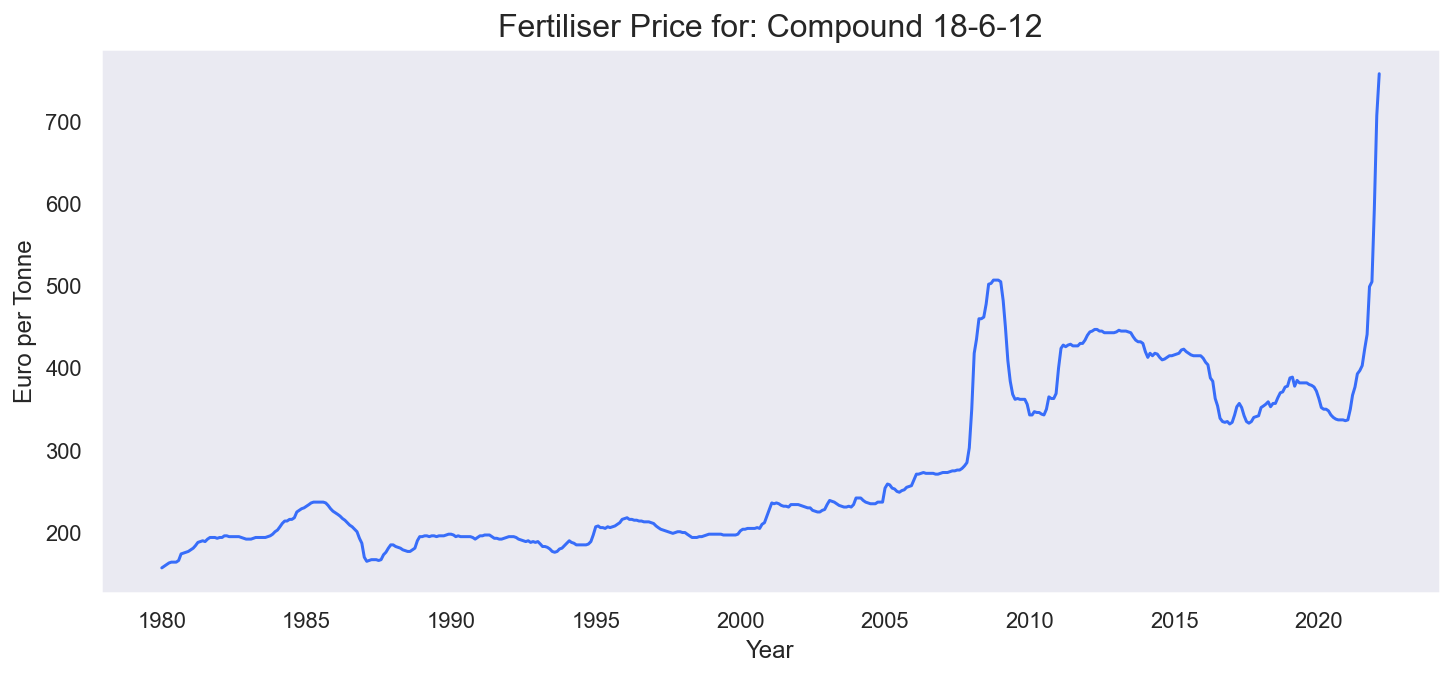

In [59]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(12, 5));  

# remove the grid on the chart
sns.set_style( {'axes.grid' : False})


# plotting month and IN, groupby if it is a bankholiday
sns.lineplot(data = df_com18612, x="Month", y="VALUE");


#plt.suptitle("Fertiliser Price for: Compound 15-3-20"); 
plt.title("Fertiliser Price for: Compound 18-6-12", fontsize = 16);

plt.ylabel('Euro per Tonne');
plt.xlabel('Year');

plt.show();